In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

from models.conv_nets import make_convNet 
from utils.train_utils import timer, inverse_squareroot_lr
from utils.visualizations import plot_loss_from_file_convnets


# keeps tensorflow from using all available GPU memory when a model is initialized.
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [ ]:
batch_size=128
n_epochs = 500_000 // (50_000 // 128) # total number desirec SGD steps / number batches per epoch

label_noise_int = 0
label_noise = label_noise_int / 100

# load the Cifar 10 data set
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
image_shape = x_train[0].shape

# apply label noise to the data set
random_idx = np.random.choice(x_train.shape[0], int(label_noise*x_train.shape[0]))
rand_labels = np.random.randint(low=y_train.min(), high=y_train.max(), size=len(random_idx))
y_train[random_idx] = np.expand_dims(rand_labels, axis=1)

model_histories = {}
convnet_widths = [(i + 1) for i in range(16)] + [16 + 4*(i + 1) for i in range(12)] 
convnet_depth = 5

# Paths to save model weights and 
model_weights_paths = f'trained_model_weights/conv_nets_depth_{convnet_depth}_{label_noise_int}pct_noise/'
data_save_path = 'experimental_results/conv_nets_'

for width in convnet_widths:
    # Depth 5 Conv Net using default Kaiming Uniform Initialization.
    conv_net, model_id = make_convNet(image_shape, depth=convnet_depth, init_channels=width)

    conv_net.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=inverse_squareroot_lr()),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    model_timer = timer()
    
    print(f'STARTING TRAINING: {model_id}')
    history = conv_net.fit(
        x=x_train, y=y_train, 
        validation_data=(x_test, y_test),
        epochs=n_epochs,
        batch_size=batch_size,
        verbose=0, 
        callbacks = [model_timer]
    )
    print(f'FINISHED TRAINING: {model_id}')    
    
    # add results to dictionary and store the resulting model weights.
    model_histories[model_id] = history
    history.model.save_weights(model_weights_paths+model_id)
    
    # clear GPU of prior model to decrease training times.
    tf.keras.backend.clear_session()
    
    
# store all the results in a pickle file for later graphing and analysis.
depth_5_metrics = {} 

for m_id, history in model_histories.items():
    depth_5_metrics[m_id] = history.history
    
pkl.dump(depth_5_metrics, open(data_save_path + f'depth_{convnet_depth}_{label_noise_int}pct_noise.pkl', 'wb'))

STARTING TRAINING: conv_net_depth_5_width_1
Epoch: 0000, Total Run Time: 00:00:11 - Loss: 2.0853e+00, Accuracy: 0.219, Test Loss: 1.9668e+00, Test Accuracy: 0.260
Epoch: 0025, Total Run Time: 00:01:47 - Loss: 1.6138e+00, Accuracy: 0.406, Test Loss: 1.7295e+00, Test Accuracy: 0.368
Epoch: 0050, Total Run Time: 00:03:25 - Loss: 1.5901e+00, Accuracy: 0.419, Test Loss: 1.5992e+00, Test Accuracy: 0.407
Epoch: 0075, Total Run Time: 00:05:00 - Loss: 1.5766e+00, Accuracy: 0.426, Test Loss: 1.6044e+00, Test Accuracy: 0.408
Epoch: 0100, Total Run Time: 00:06:36 - Loss: 1.5636e+00, Accuracy: 0.431, Test Loss: 1.5652e+00, Test Accuracy: 0.423
Epoch: 0125, Total Run Time: 00:08:12 - Loss: 1.5517e+00, Accuracy: 0.439, Test Loss: 1.5870e+00, Test Accuracy: 0.406
Epoch: 0150, Total Run Time: 00:09:47 - Loss: 1.5429e+00, Accuracy: 0.437, Test Loss: 1.6291e+00, Test Accuracy: 0.408
Epoch: 0175, Total Run Time: 00:11:23 - Loss: 1.5384e+00, Accuracy: 0.442, Test Loss: 1.5765e+00, Test Accuracy: 0.422
Epoc

Epoch: 0400, Total Run Time: 00:16:44 - Loss: 1.1329e+00, Accuracy: 0.597, Test Loss: 1.2395e+00, Test Accuracy: 0.561
Epoch: 0425, Total Run Time: 00:17:47 - Loss: 1.1330e+00, Accuracy: 0.595, Test Loss: 1.2208e+00, Test Accuracy: 0.564
Epoch: 0450, Total Run Time: 00:18:50 - Loss: 1.1306e+00, Accuracy: 0.596, Test Loss: 1.2403e+00, Test Accuracy: 0.559
Epoch: 0475, Total Run Time: 00:19:52 - Loss: 1.1300e+00, Accuracy: 0.596, Test Loss: 1.2628e+00, Test Accuracy: 0.560
Epoch: 0500, Total Run Time: 00:20:55 - Loss: 1.1306e+00, Accuracy: 0.594, Test Loss: 1.2169e+00, Test Accuracy: 0.565
Epoch: 0525, Total Run Time: 00:21:58 - Loss: 1.1290e+00, Accuracy: 0.597, Test Loss: 1.2144e+00, Test Accuracy: 0.572
Epoch: 0550, Total Run Time: 00:23:01 - Loss: 1.1275e+00, Accuracy: 0.596, Test Loss: 1.2518e+00, Test Accuracy: 0.558
Epoch: 0575, Total Run Time: 00:24:03 - Loss: 1.1282e+00, Accuracy: 0.596, Test Loss: 1.2172e+00, Test Accuracy: 0.572
Epoch: 0600, Total Run Time: 00:25:06 - Loss: 1.

Epoch: 0825, Total Run Time: 00:47:01 - Loss: 8.4212e-01, Accuracy: 0.701, Test Loss: 1.0532e+00, Test Accuracy: 0.638
Epoch: 0850, Total Run Time: 00:48:44 - Loss: 8.4266e-01, Accuracy: 0.700, Test Loss: 1.0499e+00, Test Accuracy: 0.639
Epoch: 0875, Total Run Time: 00:50:27 - Loss: 8.4366e-01, Accuracy: 0.700, Test Loss: 1.0863e+00, Test Accuracy: 0.625
Epoch: 0900, Total Run Time: 00:52:09 - Loss: 8.4198e-01, Accuracy: 0.700, Test Loss: 1.0727e+00, Test Accuracy: 0.634
Epoch: 0925, Total Run Time: 00:53:52 - Loss: 8.4158e-01, Accuracy: 0.702, Test Loss: 1.0753e+00, Test Accuracy: 0.629
Epoch: 0950, Total Run Time: 00:55:35 - Loss: 8.4116e-01, Accuracy: 0.701, Test Loss: 1.0466e+00, Test Accuracy: 0.640
Epoch: 0975, Total Run Time: 00:57:17 - Loss: 8.4023e-01, Accuracy: 0.701, Test Loss: 1.0549e+00, Test Accuracy: 0.638
Epoch: 1000, Total Run Time: 00:58:59 - Loss: 8.4032e-01, Accuracy: 0.702, Test Loss: 1.0605e+00, Test Accuracy: 0.632
Epoch: 1025, Total Run Time: 01:00:40 - Loss: 8.

Epoch: 1250, Total Run Time: 01:22:52 - Loss: 6.2785e-01, Accuracy: 0.777, Test Loss: 1.0107e+00, Test Accuracy: 0.680
Epoch: 1275, Total Run Time: 01:24:33 - Loss: 6.2855e-01, Accuracy: 0.778, Test Loss: 1.0257e+00, Test Accuracy: 0.675
FINISHED TRAINING: conv_net_depth_5_width_4
STARTING TRAINING: conv_net_depth_5_width_5
Epoch: 0000, Total Run Time: 00:00:06 - Loss: 1.7499e+00, Accuracy: 0.372, Test Loss: 1.8932e+00, Test Accuracy: 0.335
Epoch: 0025, Total Run Time: 00:01:49 - Loss: 7.6549e-01, Accuracy: 0.731, Test Loss: 1.0159e+00, Test Accuracy: 0.652
Epoch: 0050, Total Run Time: 00:03:33 - Loss: 6.7574e-01, Accuracy: 0.762, Test Loss: 1.1707e+00, Test Accuracy: 0.629
Epoch: 0075, Total Run Time: 00:05:18 - Loss: 6.3294e-01, Accuracy: 0.775, Test Loss: 1.0342e+00, Test Accuracy: 0.669
Epoch: 0100, Total Run Time: 00:07:03 - Loss: 6.0925e-01, Accuracy: 0.784, Test Loss: 1.0245e+00, Test Accuracy: 0.672
Epoch: 0125, Total Run Time: 00:08:47 - Loss: 5.8965e-01, Accuracy: 0.791, Test

Epoch: 0350, Total Run Time: 00:24:37 - Loss: 3.6666e-01, Accuracy: 0.865, Test Loss: 1.4534e+00, Test Accuracy: 0.668
Epoch: 0375, Total Run Time: 00:26:22 - Loss: 3.5789e-01, Accuracy: 0.868, Test Loss: 1.5286e+00, Test Accuracy: 0.658
Epoch: 0400, Total Run Time: 00:28:07 - Loss: 3.5464e-01, Accuracy: 0.868, Test Loss: 1.4634e+00, Test Accuracy: 0.674
Epoch: 0425, Total Run Time: 00:29:52 - Loss: 3.5204e-01, Accuracy: 0.871, Test Loss: 1.5616e+00, Test Accuracy: 0.664
Epoch: 0450, Total Run Time: 00:31:37 - Loss: 3.4844e-01, Accuracy: 0.872, Test Loss: 1.4840e+00, Test Accuracy: 0.674
Epoch: 0475, Total Run Time: 00:33:22 - Loss: 3.5017e-01, Accuracy: 0.868, Test Loss: 1.5375e+00, Test Accuracy: 0.671
Epoch: 0500, Total Run Time: 00:35:07 - Loss: 3.3894e-01, Accuracy: 0.874, Test Loss: 1.5462e+00, Test Accuracy: 0.665
Epoch: 0525, Total Run Time: 00:36:51 - Loss: 3.3902e-01, Accuracy: 0.873, Test Loss: 1.5787e+00, Test Accuracy: 0.668
Epoch: 0550, Total Run Time: 00:38:37 - Loss: 3.

Epoch: 0775, Total Run Time: 00:55:28 - Loss: 1.3185e-01, Accuracy: 0.950, Test Loss: 3.1003e+00, Test Accuracy: 0.676
Epoch: 0800, Total Run Time: 00:57:15 - Loss: 1.3436e-01, Accuracy: 0.950, Test Loss: 3.2333e+00, Test Accuracy: 0.667
Epoch: 0825, Total Run Time: 00:59:02 - Loss: 1.2812e-01, Accuracy: 0.952, Test Loss: 3.2487e+00, Test Accuracy: 0.666
Epoch: 0850, Total Run Time: 01:00:49 - Loss: 1.2053e-01, Accuracy: 0.954, Test Loss: 3.2569e+00, Test Accuracy: 0.672
Epoch: 0875, Total Run Time: 01:02:36 - Loss: 1.2206e-01, Accuracy: 0.954, Test Loss: 3.3573e+00, Test Accuracy: 0.671
Epoch: 0900, Total Run Time: 01:04:23 - Loss: 1.2220e-01, Accuracy: 0.954, Test Loss: 3.3914e+00, Test Accuracy: 0.672
Epoch: 0925, Total Run Time: 01:06:11 - Loss: 1.2304e-01, Accuracy: 0.953, Test Loss: 3.3315e+00, Test Accuracy: 0.674
Epoch: 0950, Total Run Time: 01:07:58 - Loss: 1.1721e-01, Accuracy: 0.957, Test Loss: 3.3683e+00, Test Accuracy: 0.674
Epoch: 0975, Total Run Time: 01:09:45 - Loss: 1.

Epoch: 1200, Total Run Time: 01:28:44 - Loss: 3.1759e-02, Accuracy: 0.988, Test Loss: 5.0863e+00, Test Accuracy: 0.681
Epoch: 1225, Total Run Time: 01:30:34 - Loss: 3.1219e-02, Accuracy: 0.989, Test Loss: 5.1688e+00, Test Accuracy: 0.674
Epoch: 1250, Total Run Time: 01:32:24 - Loss: 2.3675e-02, Accuracy: 0.992, Test Loss: 5.1283e+00, Test Accuracy: 0.682
Epoch: 1275, Total Run Time: 01:34:15 - Loss: 2.4220e-02, Accuracy: 0.991, Test Loss: 5.0570e+00, Test Accuracy: 0.683
FINISHED TRAINING: conv_net_depth_5_width_8
STARTING TRAINING: conv_net_depth_5_width_9
Epoch: 0000, Total Run Time: 00:00:06 - Loss: 1.7340e+00, Accuracy: 0.390, Test Loss: 1.8792e+00, Test Accuracy: 0.361
Epoch: 0025, Total Run Time: 00:01:57 - Loss: 4.3432e-01, Accuracy: 0.847, Test Loss: 1.1003e+00, Test Accuracy: 0.684
Epoch: 0050, Total Run Time: 00:03:48 - Loss: 2.6395e-01, Accuracy: 0.904, Test Loss: 1.3392e+00, Test Accuracy: 0.696
Epoch: 0075, Total Run Time: 00:05:39 - Loss: 1.8519e-01, Accuracy: 0.931, Test

Epoch: 0300, Total Run Time: 00:22:21 - Loss: 3.3206e-03, Accuracy: 1.000, Test Loss: 2.3750e+00, Test Accuracy: 0.717
Epoch: 0325, Total Run Time: 00:24:11 - Loss: 1.7991e-03, Accuracy: 1.000, Test Loss: 2.4466e+00, Test Accuracy: 0.720
Epoch: 0350, Total Run Time: 00:26:02 - Loss: 1.6040e-03, Accuracy: 1.000, Test Loss: 2.5421e+00, Test Accuracy: 0.720
Epoch: 0375, Total Run Time: 00:27:54 - Loss: 1.1939e-03, Accuracy: 1.000, Test Loss: 2.6023e+00, Test Accuracy: 0.715
Epoch: 0400, Total Run Time: 00:29:45 - Loss: 1.0311e-03, Accuracy: 1.000, Test Loss: 2.6812e+00, Test Accuracy: 0.714
Epoch: 0425, Total Run Time: 00:31:37 - Loss: 1.2180e-03, Accuracy: 1.000, Test Loss: 2.7033e+00, Test Accuracy: 0.716
Epoch: 0450, Total Run Time: 00:33:30 - Loss: 7.6243e-04, Accuracy: 1.000, Test Loss: 2.7542e+00, Test Accuracy: 0.717
Epoch: 0475, Total Run Time: 00:35:23 - Loss: 1.0998e-03, Accuracy: 1.000, Test Loss: 2.7898e+00, Test Accuracy: 0.718
Epoch: 0500, Total Run Time: 00:37:17 - Loss: 8.

Epoch: 0725, Total Run Time: 00:43:44 - Loss: 3.2300e-04, Accuracy: 1.000, Test Loss: 2.8131e+00, Test Accuracy: 0.722
Epoch: 0750, Total Run Time: 00:45:14 - Loss: 2.4667e-04, Accuracy: 1.000, Test Loss: 2.8367e+00, Test Accuracy: 0.723
Epoch: 0775, Total Run Time: 00:46:44 - Loss: 1.9663e-04, Accuracy: 1.000, Test Loss: 2.8576e+00, Test Accuracy: 0.722
Epoch: 0800, Total Run Time: 00:48:13 - Loss: 2.0403e-04, Accuracy: 1.000, Test Loss: 2.8684e+00, Test Accuracy: 0.722
Epoch: 0825, Total Run Time: 00:49:43 - Loss: 2.1899e-04, Accuracy: 1.000, Test Loss: 2.8866e+00, Test Accuracy: 0.722
Epoch: 0850, Total Run Time: 00:51:13 - Loss: 2.0299e-04, Accuracy: 1.000, Test Loss: 2.8997e+00, Test Accuracy: 0.721
Epoch: 0875, Total Run Time: 00:52:43 - Loss: 1.7246e-04, Accuracy: 1.000, Test Loss: 2.9138e+00, Test Accuracy: 0.721
Epoch: 0900, Total Run Time: 00:54:13 - Loss: 1.4490e-04, Accuracy: 1.000, Test Loss: 2.9207e+00, Test Accuracy: 0.721
Epoch: 0925, Total Run Time: 00:55:43 - Loss: 2.

Epoch: 1150, Total Run Time: 01:19:17 - Loss: 1.6509e-03, Accuracy: 1.000, Test Loss: 1.9092e+00, Test Accuracy: 0.736
Epoch: 1175, Total Run Time: 01:20:51 - Loss: 9.8655e-04, Accuracy: 1.000, Test Loss: 1.9786e+00, Test Accuracy: 0.736
Epoch: 1200, Total Run Time: 01:22:24 - Loss: 9.7984e-04, Accuracy: 1.000, Test Loss: 2.0599e+00, Test Accuracy: 0.737
Epoch: 1225, Total Run Time: 01:23:58 - Loss: 6.7406e-04, Accuracy: 1.000, Test Loss: 2.0860e+00, Test Accuracy: 0.737
Epoch: 1250, Total Run Time: 01:25:32 - Loss: 5.7234e-04, Accuracy: 1.000, Test Loss: 2.1265e+00, Test Accuracy: 0.735
Epoch: 1275, Total Run Time: 01:27:05 - Loss: 4.9589e-04, Accuracy: 1.000, Test Loss: 2.1609e+00, Test Accuracy: 0.735
FINISHED TRAINING: conv_net_depth_5_width_12
STARTING TRAINING: conv_net_depth_5_width_13
Epoch: 0000, Total Run Time: 00:00:05 - Loss: 1.8164e+00, Accuracy: 0.383, Test Loss: 1.6037e+00, Test Accuracy: 0.414
Epoch: 0025, Total Run Time: 00:01:40 - Loss: 2.5331e-01, Accuracy: 0.912, Te

Epoch: 0250, Total Run Time: 00:15:51 - Loss: 4.1864e-04, Accuracy: 1.000, Test Loss: 1.8812e+00, Test Accuracy: 0.740
Epoch: 0275, Total Run Time: 00:17:27 - Loss: 3.5282e-04, Accuracy: 1.000, Test Loss: 1.9103e+00, Test Accuracy: 0.739
Epoch: 0300, Total Run Time: 00:19:02 - Loss: 3.1084e-04, Accuracy: 1.000, Test Loss: 1.9288e+00, Test Accuracy: 0.740
Epoch: 0325, Total Run Time: 00:20:37 - Loss: 2.8055e-04, Accuracy: 1.000, Test Loss: 1.9507e+00, Test Accuracy: 0.740
Epoch: 0350, Total Run Time: 00:22:12 - Loss: 2.5718e-04, Accuracy: 1.000, Test Loss: 1.9679e+00, Test Accuracy: 0.741
Epoch: 0375, Total Run Time: 00:23:47 - Loss: 2.2668e-04, Accuracy: 1.000, Test Loss: 1.9823e+00, Test Accuracy: 0.742
Epoch: 0400, Total Run Time: 00:25:22 - Loss: 2.1356e-04, Accuracy: 1.000, Test Loss: 2.0008e+00, Test Accuracy: 0.739
Epoch: 0425, Total Run Time: 00:26:57 - Loss: 2.1105e-04, Accuracy: 1.000, Test Loss: 2.0267e+00, Test Accuracy: 0.739
Epoch: 0450, Total Run Time: 00:28:32 - Loss: 1.

Epoch: 0675, Total Run Time: 00:53:50 - Loss: 9.3445e-05, Accuracy: 1.000, Test Loss: 1.9544e+00, Test Accuracy: 0.749
Epoch: 0700, Total Run Time: 00:55:50 - Loss: 9.3460e-05, Accuracy: 1.000, Test Loss: 1.9657e+00, Test Accuracy: 0.748
Epoch: 0725, Total Run Time: 00:57:49 - Loss: 9.2224e-05, Accuracy: 1.000, Test Loss: 1.9735e+00, Test Accuracy: 0.749
Epoch: 0750, Total Run Time: 00:59:49 - Loss: 8.5971e-05, Accuracy: 1.000, Test Loss: 1.9778e+00, Test Accuracy: 0.749
Epoch: 0775, Total Run Time: 01:01:49 - Loss: 9.0129e-05, Accuracy: 1.000, Test Loss: 1.9861e+00, Test Accuracy: 0.748
Epoch: 0800, Total Run Time: 01:03:49 - Loss: 8.4812e-05, Accuracy: 1.000, Test Loss: 1.9938e+00, Test Accuracy: 0.749
Epoch: 0825, Total Run Time: 01:05:50 - Loss: 8.4080e-05, Accuracy: 1.000, Test Loss: 2.0057e+00, Test Accuracy: 0.748
Epoch: 0850, Total Run Time: 01:07:50 - Loss: 7.5861e-05, Accuracy: 1.000, Test Loss: 2.0081e+00, Test Accuracy: 0.749
Epoch: 0875, Total Run Time: 01:09:51 - Loss: 7.

Epoch: 1100, Total Run Time: 01:29:19 - Loss: 5.2583e-05, Accuracy: 1.000, Test Loss: 1.8345e+00, Test Accuracy: 0.760
Epoch: 1125, Total Run Time: 01:31:19 - Loss: 5.4051e-05, Accuracy: 1.000, Test Loss: 1.8406e+00, Test Accuracy: 0.760
Epoch: 1150, Total Run Time: 01:33:20 - Loss: 4.9713e-05, Accuracy: 1.000, Test Loss: 1.8427e+00, Test Accuracy: 0.759
Epoch: 1175, Total Run Time: 01:35:20 - Loss: 4.8908e-05, Accuracy: 1.000, Test Loss: 1.8457e+00, Test Accuracy: 0.759
Epoch: 1200, Total Run Time: 01:37:21 - Loss: 5.0886e-05, Accuracy: 1.000, Test Loss: 1.8527e+00, Test Accuracy: 0.759
Epoch: 1225, Total Run Time: 01:39:21 - Loss: 4.4485e-05, Accuracy: 1.000, Test Loss: 1.8542e+00, Test Accuracy: 0.760
Epoch: 1250, Total Run Time: 01:41:22 - Loss: 4.5405e-05, Accuracy: 1.000, Test Loss: 1.8601e+00, Test Accuracy: 0.758
Epoch: 1275, Total Run Time: 01:43:22 - Loss: 4.4986e-05, Accuracy: 1.000, Test Loss: 1.8598e+00, Test Accuracy: 0.759
FINISHED TRAINING: conv_net_depth_5_width_16
STA

Epoch: 0200, Total Run Time: 00:19:36 - Loss: 2.5467e-04, Accuracy: 1.000, Test Loss: 1.2146e+00, Test Accuracy: 0.787
Epoch: 0225, Total Run Time: 00:22:00 - Loss: 2.1403e-04, Accuracy: 1.000, Test Loss: 1.2304e+00, Test Accuracy: 0.787
Epoch: 0250, Total Run Time: 00:24:25 - Loss: 1.8975e-04, Accuracy: 1.000, Test Loss: 1.2462e+00, Test Accuracy: 0.786
Epoch: 0275, Total Run Time: 00:26:49 - Loss: 1.7192e-04, Accuracy: 1.000, Test Loss: 1.2588e+00, Test Accuracy: 0.787
Epoch: 0300, Total Run Time: 00:29:15 - Loss: 1.5198e-04, Accuracy: 1.000, Test Loss: 1.2707e+00, Test Accuracy: 0.786
Epoch: 0325, Total Run Time: 00:31:42 - Loss: 1.4342e-04, Accuracy: 1.000, Test Loss: 1.2796e+00, Test Accuracy: 0.785
Epoch: 0350, Total Run Time: 00:34:07 - Loss: 1.2697e-04, Accuracy: 1.000, Test Loss: 1.2904e+00, Test Accuracy: 0.786
Epoch: 0375, Total Run Time: 00:36:33 - Loss: 1.1935e-04, Accuracy: 1.000, Test Loss: 1.2984e+00, Test Accuracy: 0.785
Epoch: 0400, Total Run Time: 00:38:59 - Loss: 1.

Epoch: 0625, Total Run Time: 01:03:50 - Loss: 5.5728e-05, Accuracy: 1.000, Test Loss: 1.2486e+00, Test Accuracy: 0.791
Epoch: 0650, Total Run Time: 01:06:23 - Loss: 5.3714e-05, Accuracy: 1.000, Test Loss: 1.2523e+00, Test Accuracy: 0.791
Epoch: 0675, Total Run Time: 01:08:58 - Loss: 5.0386e-05, Accuracy: 1.000, Test Loss: 1.2567e+00, Test Accuracy: 0.792
Epoch: 0700, Total Run Time: 01:11:32 - Loss: 4.8525e-05, Accuracy: 1.000, Test Loss: 1.2602e+00, Test Accuracy: 0.791
Epoch: 0725, Total Run Time: 01:14:06 - Loss: 4.6444e-05, Accuracy: 1.000, Test Loss: 1.2652e+00, Test Accuracy: 0.791
Epoch: 0750, Total Run Time: 01:16:39 - Loss: 4.5165e-05, Accuracy: 1.000, Test Loss: 1.2681e+00, Test Accuracy: 0.790
Epoch: 0775, Total Run Time: 01:19:13 - Loss: 4.3542e-05, Accuracy: 1.000, Test Loss: 1.2718e+00, Test Accuracy: 0.791
Epoch: 0800, Total Run Time: 01:21:47 - Loss: 4.4256e-05, Accuracy: 1.000, Test Loss: 1.2746e+00, Test Accuracy: 0.790
Epoch: 0825, Total Run Time: 01:24:21 - Loss: 3.

Epoch: 1050, Total Run Time: 01:19:10 - Loss: 2.8097e-05, Accuracy: 1.000, Test Loss: 1.2166e+00, Test Accuracy: 0.798
Epoch: 1075, Total Run Time: 01:20:28 - Loss: 2.7098e-05, Accuracy: 1.000, Test Loss: 1.2174e+00, Test Accuracy: 0.799
Epoch: 1100, Total Run Time: 01:21:46 - Loss: 2.6324e-05, Accuracy: 1.000, Test Loss: 1.2193e+00, Test Accuracy: 0.798
Epoch: 1125, Total Run Time: 01:23:04 - Loss: 2.5717e-05, Accuracy: 1.000, Test Loss: 1.2220e+00, Test Accuracy: 0.798
Epoch: 1150, Total Run Time: 01:24:22 - Loss: 2.6080e-05, Accuracy: 1.000, Test Loss: 1.2240e+00, Test Accuracy: 0.798
Epoch: 1175, Total Run Time: 01:25:40 - Loss: 2.4772e-05, Accuracy: 1.000, Test Loss: 1.2257e+00, Test Accuracy: 0.798
Epoch: 1200, Total Run Time: 01:26:59 - Loss: 2.4422e-05, Accuracy: 1.000, Test Loss: 1.2283e+00, Test Accuracy: 0.798
Epoch: 1225, Total Run Time: 01:28:17 - Loss: 2.4059e-05, Accuracy: 1.000, Test Loss: 1.2306e+00, Test Accuracy: 0.798
Epoch: 1250, Total Run Time: 01:29:36 - Loss: 2.

Epoch: 0150, Total Run Time: 00:09:21 - Loss: 2.3431e-04, Accuracy: 1.000, Test Loss: 9.3635e-01, Test Accuracy: 0.812
Epoch: 0175, Total Run Time: 00:10:53 - Loss: 1.9684e-04, Accuracy: 1.000, Test Loss: 9.4908e-01, Test Accuracy: 0.812
Epoch: 0200, Total Run Time: 00:12:26 - Loss: 1.6918e-04, Accuracy: 1.000, Test Loss: 9.5975e-01, Test Accuracy: 0.812
Epoch: 0225, Total Run Time: 00:13:58 - Loss: 1.4250e-04, Accuracy: 1.000, Test Loss: 9.7020e-01, Test Accuracy: 0.812
Epoch: 0250, Total Run Time: 00:15:31 - Loss: 1.2742e-04, Accuracy: 1.000, Test Loss: 9.7781e-01, Test Accuracy: 0.812
Epoch: 0275, Total Run Time: 00:17:03 - Loss: 1.1511e-04, Accuracy: 1.000, Test Loss: 9.8699e-01, Test Accuracy: 0.812
Epoch: 0300, Total Run Time: 00:18:35 - Loss: 1.0374e-04, Accuracy: 1.000, Test Loss: 9.9550e-01, Test Accuracy: 0.812
Epoch: 0325, Total Run Time: 00:20:08 - Loss: 9.2749e-05, Accuracy: 1.000, Test Loss: 1.0025e+00, Test Accuracy: 0.812
Epoch: 0350, Total Run Time: 00:21:41 - Loss: 8.

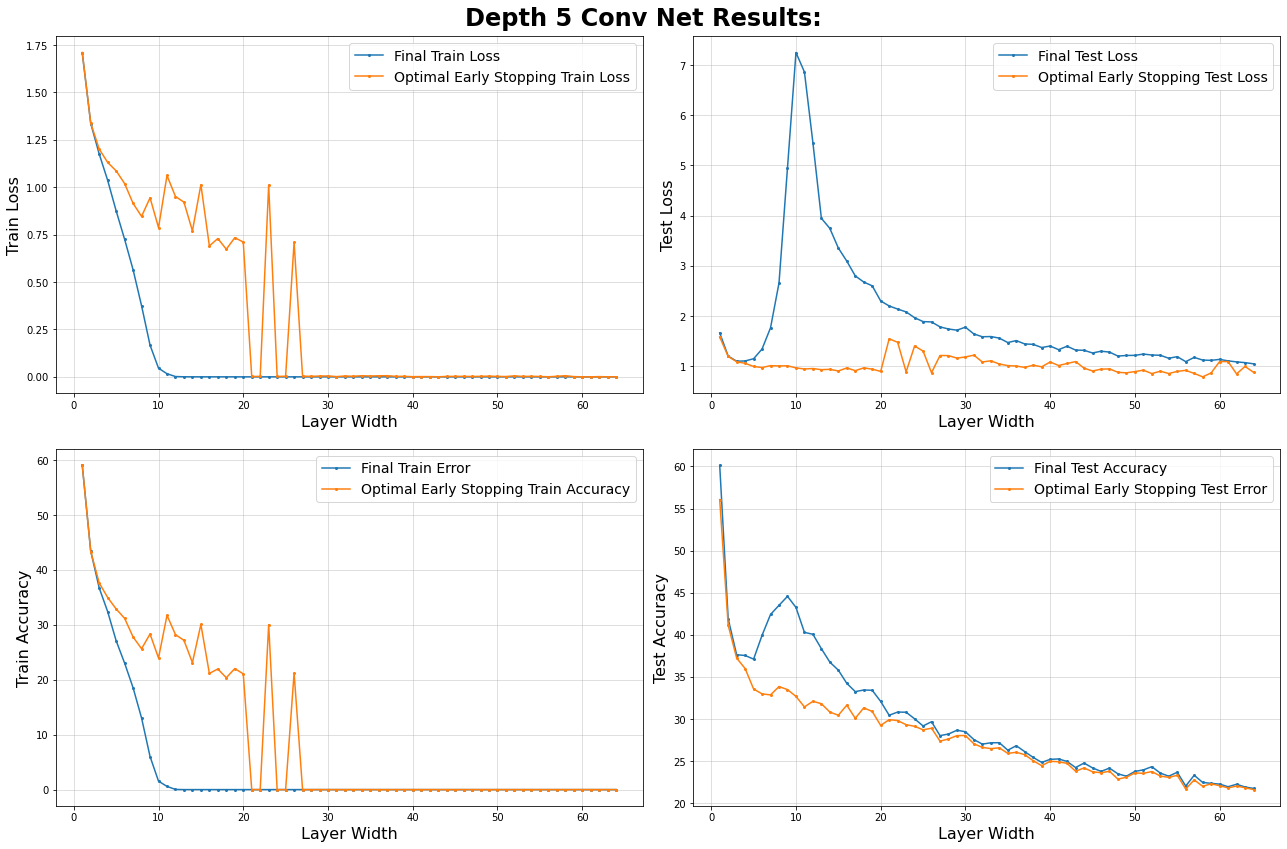

In [2]:
convnet_depth = 5
plot_path = f'experimental_results/conv_nets_depth_{convnet_depth}_{label_noise_int}pct_noise.pkl'
plot_loss_from_file_convnets(plot_path, depth=convnet_depth)

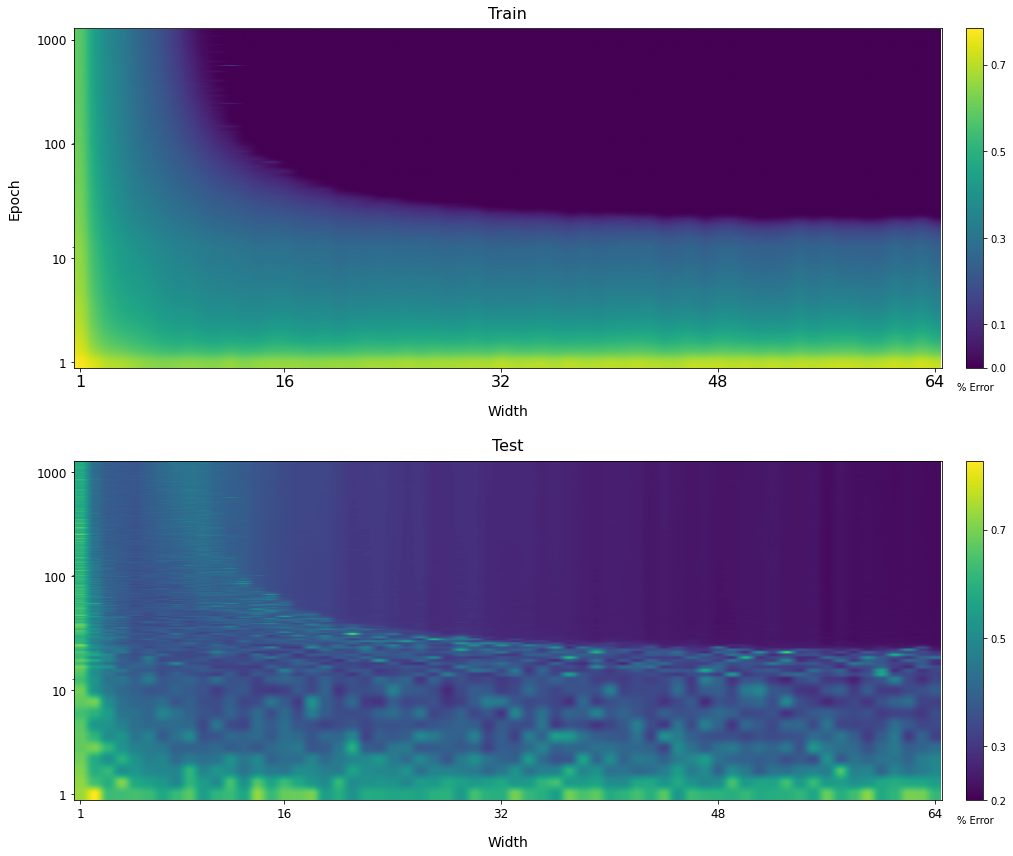

In [141]:
plot_loss_vs_epoch_from_file_convnets(
    plot_path, 
    depth=5,
    x_idx=[0, 15, 31, 47, 63], 
    contour_levels=None
)